In [81]:
import pandas as pd
import numpy as np
from main import load_data
from lifelines.utils import survival_table_from_events
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import OneHotEncoder

In [132]:
# Loading in the training dataset from Sam's code.
train = load_data(train=True)
test = load_data(train=False)
display(train, test)

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,time_elapsed
0,True,P,False,False,I 0-6,True,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2018-07-01,B,6
1,False,P,False,False,I 0-6,True,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-06-01,C,17
2,True,T,False,False,I 7-12,True,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-05-01,A,16
3,True,T,False,True,I 0-6,True,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2018-06-01,B,5
4,True,P,False,False,A,False,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2019-02-01,B,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,False,T,True,False,A,True,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,A,0
5758219,True,I,True,False,A,True,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,C,0
5758220,True,R,True,False,I 0-6,True,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,B,0
5758221,False,T,True,False,Recovery,True,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,2019-12-01,B,0


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,True,T,False,False,I 0-6,True,761+,NaN,42,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,B
1,False,P,False,False,A,True,761+,NaN,48,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,B
2,False,C,False,False,I 0-6,False,761+,NaN,244,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,A
3,True,R,False,False,I 0-6,True,621-640,NaN,76,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,A
4,True,P,False,False,I 0-6,True,761+,NaN,143,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,True,I,True,False,I 13-24,True,621-640,NaN,26,1.0,...,1363.04,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,A
19862,False,R,True,False,A,True,641-660,NaN,299,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,C
19863,True,I,False,False,I 0-6,True,741-760,NaN,4,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,C
19864,True,P,True,True,A,True,701-720,NaN,24,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,2020-01-01,B


In [15]:
# Making the prediction column.
train['time_elapsed'] = np.round((train['mth_code'] - train['snapshot']) / pd.Timedelta(days=30)).astype(int)
train[['time_elapsed']].describe().round(2)

,time_elapsed
count,5758223.00
mean,7.53
std,5.73
min,0.00
25%,3.00
50%,6.00
75%,12.00
max,23.00


In [17]:
table = survival_table_from_events(train['time_elapsed'], train['charge_off'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,475284,0,475284,5758223,5758223
1.0,454548,1376,453172,0,5282939
2.0,432902,1330,431572,0,4828391
3.0,411442,1252,410190,0,4395489
4.0,390183,1220,388963,0,3984047
5.0,368941,1197,367744,0,3593864
6.0,347951,1108,346843,0,3224923
7.0,327177,1077,326100,0,2876972
8.0,306352,919,305433,0,2549795


<AxesSubplot:xlabel='timeline'>

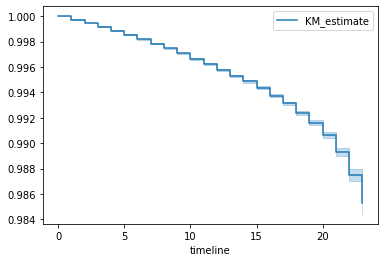

In [29]:
# Plotting a KMF model.
kmf = KaplanMeierFitter()
kmf.fit(train['time_elapsed'], event_observed=train['charge_off'])
kmf.plot_survival_function()

In [32]:
features = [
    'time_elapsed',
    'charge_off',
    'bank_fico_buckets_20',
    'promotion_flag',
    'ever_delinquent_flg',
    'financial_active',
    'credit_limit_amt',
    'stmt_balance',
    'prev_balance',
    'active',
    'closed',
    'nbr_mths_due',
    'active',
    'closed'
]

train_clean = train[features]

# Dropping missing FICO scores.
train_clean = train_clean[~train_clean['bank_fico_buckets_20'].isin([
    'Missing',
    'Exception'
])]

codes = {
    '<= 560': 0,
    '561-580': 1,
    '581-600': 2,
    '601-620': 3,
    '621-640': 4,
    '641-660': 5,
    '661-680': 6,
    '681-700': 7,
    '701-720': 8,
    '721-740': 9,
    '741-760': 10,
    '761+': 11
}

train_clean['bank_fico_buckets_20_code'] = \
    train_clean['bank_fico_buckets_20'].map(codes)

# Low/high (1/0) credit score mapping with threshold of 661 based off Google.
codes_simple = {
    '<= 560': 1,
    '561-580': 1,
    '581-600': 1,
    '601-620': 1,
    '621-640': 1,
    '641-660': 0,
    '661-680': 0,
    '681-700': 0,
    '701-720': 0,
    '721-740': 0,
    '741-760': 0,
    '761+': 0
}

train_clean['bank_fico_buckets_20_code_simple'] = \
    train_clean['bank_fico_buckets_20'].map(codes_simple)

train_clean['credit_limit_low'] = \
    train_clean['credit_limit_amt'].map(lambda amt: 1.0 if amt < 5_000 else 0.0)

train_clean['balance_diff'] = \
    train_clean['stmt_balance'] - train_clean['prev_balance']

train_clean['low_balance_diff'] = \
    train_clean['balance_diff'].map(lambda bal: 1.0 if bal < 5_000 else 0.0)

train_clean['mths_due_high'] = \
    train_clean['nbr_mths_due'].map(lambda nbr_mths: 1.0 if nbr_mths >= 5 else 0.0)

train_clean

,time_elapsed,charge_off,bank_fico_buckets_20,promotion_flag,ever_delinquent_flg,financial_active,credit_limit_amt,stmt_balance,prev_balance,active,closed,nbr_mths_due,active,closed,bank_fico_buckets_20_code,bank_fico_buckets_20_code_simple,credit_limit_low,balance_diff,low_balance_diff,mths_due_high
0,6,False,581-600,False,False,True,5900.0,34.77,1918.32,True,False,0,True,False,2.0,1.0,0.0,-1883.55,1.0,0.0
1,17,False,721-740,False,False,False,5000.0,0.00,0.00,True,False,0,True,False,9.0,0.0,0.0,0.00,1.0,0.0
2,16,False,761+,False,False,True,3100.0,0.00,0.00,True,False,0,True,False,11.0,0.0,1.0,0.00,1.0,0.0
3,5,False,761+,False,True,True,700.0,0.00,0.00,True,False,0,True,False,11.0,0.0,1.0,0.00,1.0,0.0
4,13,False,721-740,False,False,True,3500.0,0.00,0.00,True,False,2,True,False,9.0,0.0,1.0,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,0,False,641-660,True,False,False,2000.0,1288.19,2075.71,True,False,0,True,False,5.0,0.0,1.0,-787.52,1.0,0.0
5758219,0,False,701-720,True,False,True,950.0,27.08,205.11,True,False,0,True,False,8.0,0.0,1.0,-178.03,1.0,0.0
5758220,0,False,741-760,True,False,True,6100.0,0.00,3800.00,True,False,0,True,False,10.0,0.0,0.0,-3800.00,1.0,0.0
5758221,0,False,681-700,True,False,False,1000.0,662.81,13421.00,True,False,0,True,False,7.0,0.0,1.0,-12758.19,1.0,0.0


In [49]:
cph = CoxPHFitter()
features = [
    'time_elapsed', # dependent
    'charge_off', # flag
    'bank_fico_buckets_20_code',
    'promotion_flag',
    'ever_delinquent_flg',
    'financial_active',
    'credit_limit_low',
    'low_balance_diff'
]
cph.fit(train_clean[features], duration_col='time_elapsed', event_col='charge_off')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5.71961e+06 total observations, 5.70412e+06 right-censored observations>
             duration col = 'time_elapsed'
                event col = 'charge_off'
      baseline estimation = breslow
   number of observations = 5.71961e+06
number of events observed = 15484
   partial log-likelihood = -193434.58
         time fit was run = 2023-03-25 20:41:19 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
bank_fico_buckets_20_code  -0.53       0.59       0.00            -0.53            -0.52                 0.59                 0.59
promotion_flag              0.76       2.14       0.02             0.73             0.79                 2.08                 2.21
ever_delinquent_flg         0.43       1.54       0.02             0.39             0.47                 1.47                 1.60
financial_active            2.70      14.94       0.04             2.62             2.79                13.74                16.26
credit_limit_low            2.53      12.58       0.04             2.46             2.61                11.66                13.57
low_balance_diff            1.75       5.77       0.13             1.49             2.01                 4.45                 7.48

                            cmp to       z      p   -log2(p)
covariate                                                   
bank_fico_buckets_20_code     0.00 -184.56 <0.005        inf
promotion_flag                0.00   47.32 <0.005        inf
ever_delinquent_flg           0.00   19.91 <0.005     290.69
financial_active              0.00   62.93 <0.005        inf
credit_limit_low              0.00   65.18 <0.005        inf
low_balance_diff              0.00   13.20 <0.005     129.80
---
Concordance = 0.94
Partial AIC = 386881.16
log-likelihood ratio test = 65721.26 on 6 df
-log2(p) of ll-ratio test = inf

In [72]:
results = cph.predict_survival_function(train_clean.sample(n=10_000))

In [80]:
s = (10000 - results.sum(axis=1)).values
dates = [f"2020{i:02d}" for i in range(2, 13)] + ["202101"]
list(zip(dates, s[1:] - s[:-1]))

[('202002', 2.7018770273407426),
 ('202003', 2.828655999383045),
 ('202004', 2.9137266189736692),
 ('202005', 3.1145627799287467),
 ('202006', 3.3358251302470308),
 ('202007', 3.416189227897121),
 ('202008', 3.693144130618748),
 ('202009', 3.5281610045585694),
 ('202010', 3.774501903080818),
 ('202011', 4.066647742489295),
 ('202012', 4.080787153365236),
 ('202101', 4.029873146548198)]

In [157]:
import main
num_nans = pd.isnull(train).sum()
categorical_cols = [
    col
    for col, dtype in train.dtypes.items()
    if str(dtype) == "category" \
        and col != "bank_fico_buckets_20" \
        and col != "charge_off_reason_code"
]

In [158]:
categorical_cols

['net_payment_behaviour_tripd',
 'account_status_code',
 'open_closed_flag',
 'industry']

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['feature'] = train_sub.columns

train_sub = train_sub.astype(float)

vif['vif'] = [variance_inflation_factor(train_sub.values, i) for i in range(len(train_sub.columns))]

vif

,feature,vif
0,time_elapsed,1.006325
1,charge_off,1.037401
2,net_payment_behaviour_tripd_D,22.570609
3,net_payment_behaviour_tripd_I,118.275669
4,net_payment_behaviour_tripd_P,110.201711
5,net_payment_behaviour_tripd_R,34.490796
6,net_payment_behaviour_tripd_T,68.101297
7,account_status_code_A,747.254231
8,account_status_code_I 0-6,396.474277
9,account_status_code_I 13-24,291.262233


In [182]:
for column in categorical_cols:
    print(column)
    print(train[column].value_counts().to_string())

net_payment_behaviour_tripd
I    2234217
P    1897023
T     932200
R     420828
D     262233
C      11722
account_status_code
A           3512250
I 0-6        851687
I 13-24      595459
I 7-12       535423
I 25+        251312
W             10236
Recovery       1524
MonthEnd        330
Clchange          2
open_closed_flag
1.0    5675212
0.0      83007
industry
B    3426334
A    1305509
C    1026380


In [186]:
train_sub = train[["open_closed_flag", "time_elapsed", "charge_off"]].dropna().sample(frac=0.1)
#.drop(columns=["net_payment_behaviour_tripd_C", "account_status_code_MonthEnd","account_status_code_Clchange", "account_status_code_Recovery"])
cph = CoxPHFitter()
cph.fit(
    train_sub,
    duration_col='time_elapsed',
    event_col='charge_off',
    show_progress=True,
)
cph.print_summary()

Iteration 1: norm_delta = 2.89097, step_size = 0.9500, log_lik = -19672.17108, newton_decrement = 5911.94580, seconds_since_start = 3.0
Iteration 2: norm_delta = 9014155.27707, step_size = 0.9500, log_lik = -37583.18141, newton_decrement = 40820686038.16160, seconds_since_start = 5.9


c:\Python310\lib\site-packages\lifelines\fitters\coxph_fitter.py:1676: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model